# Citation  
#### Jang, E., Gu, S., & Poole, B. (2017). Categorical Reparameterization with Gumbel-Softmax. arXiv:1611.01144. https://doi.org/10.48550/arXiv.1611.01144
#### This notebook is a personal explanation and walkthrough of the paper Categorical Reparameterization with Gumbel-Softmax. All credit for the original research goes to the authors listed above.

**Image Attribution**

#### Unless otherwise noted, all figures in this notebook are either original or sourced from Jang et al., 2017 — Categorical Reparameterization with Gumbel-Softmax.

# Introduction
#### Stochastic neural networks are powerful model which can be used to learn patterns, etc with the help of backpropagation. 
#### But Stochastic neural networks with discrete variables are impossible to train because discrete variables are not differentiable. If they are not differentiable, then the backpropagation cannot be used because it is based on differentiation of output with respect to the input. 

#### Hence, to overcome this challenge, gumbel softmax is used

# Gumbel Softmax
#### Gumbel softmax is a continuous distribution on the simplex that can approximate categorical samples so that the gradients can be computed and this can be used in backpropagation in order for the model to learn

#### A simplex is a geometric space of all possible probability vectors that Gumbel-Softmax uses to create a "soft," differentiable approximation of a hard, discrete categorical choice.

# The Gumbel softmax Distribution

#### z is a categotical random variable with class probabilities π1, π2, .... , πk.

#### Each categorical sample is represented as a one-hot vecto on the corners of the k-1 simplex.

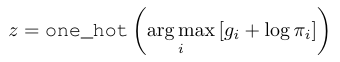

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/one-hot vector.png')

#### where g_i are independent and identically distributed (i.i.d.) sampels from the Gumbel(0, 1) distribution. g_i is the gumbel noise which is added to the log propabilities and selects the highest value. 
#### The problem with this approach is that argmax is not differentiable, so the gradients cannot flow.

# Solution: Softmax Relaxation
#### Instead of argmax, softmax can be used. This creates a continuous, differentiable approximation y.

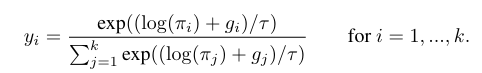

In [2]:
%matplotlib inline
from IPython.display import Image
Image('Images/softmax.png')

# Straight-through Gumbel-Softmax Estimator
#### For some applications, like sequence modeling, this continuous relaxations is good. But for problems like reinforcement Learning which uses discrete action space, the discrete exact values has to be sampled and not the continuous approximate relaxations.
#### Thus, Straight-through Gumbel-Softmax Estimator is used. 
#### During the forward pass, y (the continuous sampele) is discretized using the argmax to get a one-hot vector (z). This makes sure that the value is discrete. 
#### For backward pass (during backpropagation), the gradients are computed as if the soft continuous sample (y) is there instead of a hard z. Gradient(z) ≈ Gradient(y)
#### This is a biased estimator but reduces variance and allows discrete outputs during training.

# What are the stochastic gradient estimation techniques for discrete variables are used before the ST gumbel Estimator?

### 1) Path Derivative Gradient Estimators
### 2) Score Function-Based Gradient Estimators


#### The objective is to minimize the expected loss L(θ) using gradient descent by calculating the estimates.

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/expected loss.png')

# 1) Path Derivative Gradient Estimators
#### While training neural networks, the backpropagation is used to calculate how a small change in parameter θ will affect the final loss (f(z)). This requires a clear, differentiable path from the output layer to the parameters.
#### But in a stochatic (random) node, the path is broken as 'randomness' is used and the sampling is not smooth. Hence, to overcome this, a path derivative gradient estimator is used. 

#### The main concept used is reparameterization trick. We compute the sample z as a deterministic function g. A deterministic function means for the same input, the same output is given. 

#### Hence, z = g(θ, ϵ) where θ are the parameters which can be changed in order to make the model learn and ϵ is the independent random variable.
#### For each time a backward pass is there, ϵ is randomly chosen in order to maintain the stochastic property of the model. 

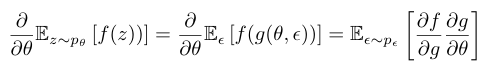

In [2]:
%matplotlib inline
from IPython.display import Image
Image('Images/path derivative estimator.png')

#### Here, we find the derivative of expectatoin of f(z) where z is sampled randomly from the distribution p_θ. But this is not differentiable. Hence, we use the reparameterization trick mentioned above and replace z with a deterministic function, g, with some parameters (θ) and an independent random variable (ϵ).

#### We use Expectation because it gives the average of all the samples in the distribution p_θ. we can then compute this by using chain rule.

# 2) Score Function-Based Gradient Estimators
#### Let's understand the below equation.

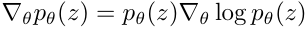

In [4]:
%matplotlib inline
from IPython.display import Image
Image('Images/log derivative.png')

#### Let f(x) = logx 
#### d(f(x))/dx = 1/x
#### The same way d(log(p_θ(z)))/dθ = 1/p_θ(z)*d(p_θ(z))/dθ. Rearranging, we get the above equation.

#### This is powerful than ST Estimator because a differentiable z or a deterministic function (f) is not required.
#### But this method has high variance with increase in the number of categorical variables (dimensions). To solve this, a control variabte b(z) is subtracted from the f(z) and then a corrective term μ_b is used.

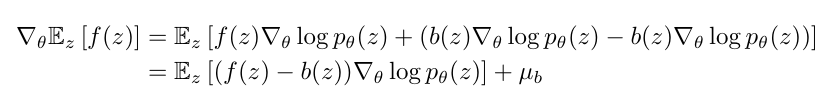

In [5]:
%matplotlib inline
from IPython.display import Image
Image('Images/control variate.png')

# Other Stochastic Gradient Estimators which use control Variate:

# i) NVIL (Neural Variational Inference and Learning):
#### It uses two baselines to reduce the high variance. 
#### a) a moving average f_bar of f to center the learning signal
#### b) an input-dependent baseline computed by a 1-layer neural network fitted to f - f_bar (a control variate for the centered learning signal itself)
#### This reduces variance by making the learning signal less noisy, improving stability.
#### Variance normalization divides the adjusted signal by a running estimate of standard deviation.

# ii) DARN (Discrete AutoRegressive Network)
#### DARN improves upon NVIL by using a Taylor expansion baseline. The baseline approximates f(z) by a first-order Taylor expansion around a mean input
#### For Bernoulli variables (binary), it uses a fixed bias to approximate the correction term, which introduces some bias but reduces variance.
#### Allows gradient information to flow partially through discrete variables

# iii) MuProp
#### MuProp also uses a Taylor expansion based baseline like DARN but computes the baseline using a mean-field approximation.
#### This approximation replaces discrete variables with their expected values for easier gradient computation.
#### It enables unbiased gradient estimation by combining pathwise gradients for the mean-field part and score function estimators for the residual
#### Helps for training stochastic neural networks without needing differentiable sampling functions

# iv) VIMCO (Variational Inference for Monte Carlo Objectives)
#### VIMCO is designed for multi-sample objectives which use multiple samples to tighten variational bounds.
#### It creates sample-specific baselines by taking the average of other samples, which reduces variance significantly in a multi-sample setting.
#### Efficient for training models with multiple latent samples per data point.
#### Not covered in the paper's experiments as it focuses on single-sample objectives.

# Semi-Supervised Generative Models
#### The model learns from both labelled dataset (x, y) and unlabelled dataset (x), where x is observations and y is the corresponding labels. 
#### The model uses latent variables split into: A Gaussian "style" variable (z) and a categorical "class" variable  (y)

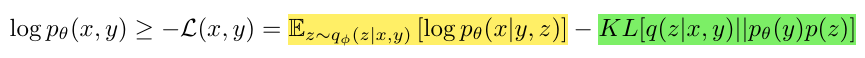

In [8]:
%matplotlib inline
from IPython.display import Image
Image('Images/variational lower bound on labelled dataset.png')

#### log p_θ(x,y) is the true log-likelihood of data x and label y.
#### Variational Inference introduces an approximate posterior qϕ(z∣x,y)
#### The right side, −L(x,y) is a lower bound (Evidence Lower Bound, ELBO) on the true log-likelihood.

#### Maximizing this lower bound indirectly maximizes log p_θ(x,y)

#### The first term is marked in yellow. It is known as the expectation term. It measures how well the model reconstructs x given latent variables.
#### The second term is marked in green. The KL divergence measures how close our approximate posterior qϕ is to the prior p(z) weighted by pθ(y).

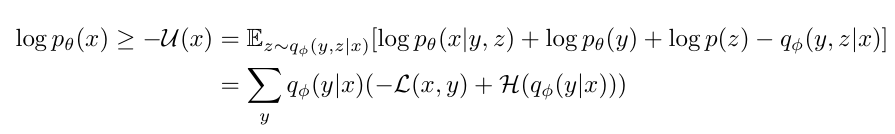

In [9]:
%matplotlib inline
from IPython.display import Image
Image('Images/Variational lower bound for unlabelled dataset.png')

#### log pθ(x) is the true log-likelihood of x without known y

#### Since labels are unknown, inference must consider all possible labels y.

#### qϕ(y ∣ z, x) is the approximate posterior over both y and z.

#### The right-hand side is again a variational lower bound on log pθ(x) allowing optimization without knowing y.
#### log pθ (x ∣ y,z) means likelihood of input x given latent variables.
#### log pθ(y), log pθ(z) means priors on latent variables.
#### log qϕ(y ∣ z, x) means approximate posterior, acts as a regularizer.

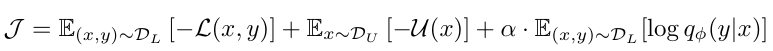

In [10]:
%matplotlib inline
from IPython.display import Image
Image('Images/Full Maximization Objective.png')

#### This combines Labeled data loss (with known y), Unlabeled data loss (marginalizing over y), An auxiliary classification loss weighted by α
#### This mixes supervised and unsupervised learning components.

# Conclusion:
#### The Gumbel-Softmax distribution as a continuous, differentiable approximation to categorical distributions, enabling direct backpropagation through discrete latent variables in neural networks. By using this reparameterization, it achieves efficient and stable gradient estimation, outperforming previous estimators in various tasks such as structured prediction and unsupervised generative modeling. The method also facilitates scalable semi-supervised learning by enabling differentiable sampling of categorical labels, avoiding costly marginalization over classes.